0 MTF for elecricity

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math
import plotly.express as px

## Importing the dataset

In [69]:
df = pd.read_csv('Main_dataset.csv')
df.shape

(3295, 43)

## Analysing different Attributes

Attributes which are analysed for MTF_Rwanda_Questionnaire_Household: 

1. Capacity
2. Availability
3. Reliability
4. Quality
5. Affordability - not collected in this report
6. legality
7. Health and safety

In [70]:
df.columns

Index(['Unnamed: 0', 'C22', 'C64', 'C88', 'C117', 'C119A', 'C26A', 'C26B',
       'C68A', 'C68B', 'C107A', 'C107B', 'C127', 'C137A', 'C137B', 'C172A',
       'C172B', 'C27A', 'C27B', 'C69A', 'C69B', 'C108A', 'C108B', 'C138A',
       'C138B', 'C173A', 'C173B', 'C29A', 'C29B', 'C71A', 'C71B', 'C39', 'C81',
       'C110', 'C140', 'C17', 'C57', 'C41', 'C83', 'C112', 'C130', 'C142',
       'C175'],
      dtype='object')

# Attribute: Capacity

To find out the power capacity, we need to know the different sources of power available. From our dataset:
    
1. C22: Power available from the national grid
2. C64: Power available from the mini grid
3. C88: Power available from the generator set
4. C117: Power available from the inverter
5. C119: Power available from the batteries
6. C151: Power available from solar panel (Not present in the dataset but is there in the survey)
7. C154: Power available from solar batteries (Not present in the dataset but is there in the survey)
8. Other source: Pico-Hyro (power capacity question not mentioned in the survey)

In [71]:
df_capacity = df[['C22', 'C64','C88','C117','C119A']]

In [72]:
# renaming the columns
df_capacity.columns = ['National_Grid', 'Mini_Grid','Generator','Inverter','Battery']

## Total_capacity
Total capacity is the sum of capacities of all the power sources.

1. Page 14 of MTF Energy Access Country Diagnostic report confirms that the average monthly household consumption of electricity is 20.8 kWh nationwide, 29.2 kWh in urban areas, and 9.9 kWh in rural areas. This means that the values recorded in the MTF survey for capacity are in kWh.

2. 26.8% of households households have been assessed as having basic access to electricity supply. The remaining 73.2% have no electricity source

In [73]:
lst=[]
for i in range(df_capacity.shape[0]):
    temp=0
    for j in range(df_capacity.shape[1]):
        if math.isnan(df_capacity.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_capacity.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_capacity["Total_Capacity_in_kWh_month"] = lst

In [74]:
df_capacity[50:60]

,National_Grid,Mini_Grid,Generator,Inverter,Battery,Total_Capacity_in_kWh_month
50,NaN,NaN,NaN,NaN,NaN,0.00
51,NaN,NaN,NaN,NaN,NaN,0.00
52,NaN,NaN,NaN,NaN,NaN,0.00
53,NaN,NaN,NaN,NaN,NaN,0.00
54,NaN,NaN,NaN,NaN,NaN,0.00
55,18.60,NaN,NaN,NaN,NaN,18.60
56,20.93,NaN,NaN,NaN,NaN,20.93
57,4.65,NaN,NaN,NaN,NaN,4.65
58,4.65,NaN,NaN,NaN,NaN,4.65
59,NaN,NaN,NaN,NaN,NaN,0.00


The power capacity units provided in the dataset are in monthly kWh. However, for TIER analysis the units are in daily Wh consumption. Therefore, dividing the dataset by 30 and multiplying it by 1000.

In [75]:
df_capacity["Total_Capacity_in_W"] = df_capacity["Total_Capacity_in_kWh_month"].apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [76]:
# Replacing 0 values again with NaN
df_capacity["Total_Capacity_in_W"].replace(0, np.nan, inplace=True)
#df_capacity["Total_Capacity_in_W"]

In [77]:
#Replacing NaN values with "Missing_data" 
df_capacity["Total_Capacity_in_W"] = df_capacity["Total_Capacity_in_W"].apply(lambda x: "Missing_data" if math.isnan(x) else x)

### Calculating the tier level

In [78]:
def fun_E_capacity(Total_Capacity):
    if Total_Capacity == 'Missing_data':
        return 0
    elif Total_Capacity<3:
        return 0
    elif 3 <= Total_Capacity < 50:
        return 1
    elif 50 <= Total_Capacity < 200:
        return 2
    elif 200 <= Total_Capacity < 800:
        return 3
    elif 800 <= Total_Capacity < 2000:
        return 4
    else:
        return 5
    
func = np.vectorize(fun_E_capacity)
df_capacity["E_capacity"] = func(df_capacity["Total_Capacity_in_W"])
#df_capacity["E_capacity"] 

Text(0.5, 1.0, 'TIER levels based on power capacity')

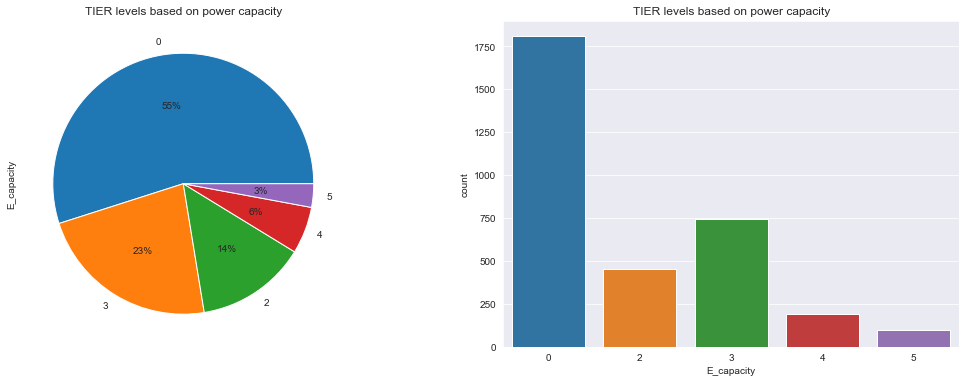

In [79]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_capacity["E_capacity"].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('E_capacity',data=df_capacity,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In [80]:
#sns.pairplot(df_capacity)

# Attribute: Availabilty

## Availability: Day and night

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C26A represents the hours of electricity available each day and night from the national grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each day and night from  the national grid in the typical months.
* C68A represents the hours of electricity available each day and night from the mini grid in the worst months.
* Whereas, C68B represents the hours of electricity available each day and night from  the mini grid in the typical months.
* C107A represents the hours of electricity available each day and night from the generator set in the worst months.
* Whereas, C107B represents the hours of electricity available each day and night from  the generator set in the typical months.
* C127 represents the hours of electricity available each day from the rechargeable battery.
* C137A represents the hours of electricity available each day and night from pico-hydro in the worst months.
* Whereas, C137B represents the hours of electricity available each day and night from  pico-hydro in the typical months.
* C172A represents the hours of electricity available each day and night from  main solar based devices in the worst months.
* Whereas, C172B represents the hours of electricity available each day and night from  main solar based devices in the typical months.

In [81]:
df_availablity_day= df[['C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B']]

In [82]:
df_availablity_day.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Battery','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

### Day Total-Availability

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [83]:
#National Grid
df_availablity_day['National_grid_Total'] = df_availablity_day.National_grid_Worst.fillna(value=df_availablity_day.National_grid_Typical)

#National Grid
df_availablity_day['Mini_grid_Total'] = df_availablity_day.Mini_grid_Worst.fillna(value=df_availablity_day.Mini_grid_Typical)

#Generator Set
df_availablity_day['Generator_set_Total'] = df_availablity_day.Generator_set_Worst.fillna(value=df_availablity_day.Generator_set_Typical)

#Pico Hydro
df_availablity_day['Pico_hydro_Total'] = df_availablity_day.Pico_hydro_Worst.fillna(value=df_availablity_day.Pico_hydro_Typical)

#Solar Devicce
df_availablity_day['Solar_device_Total'] = df_availablity_day.Solar_device_Worst.fillna(value=df_availablity_day.Solar_device_Typical)


#Taking only the total values into consideration
df_av_day=df_availablity_day[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total','Battery']]

In [84]:
#Changing the string variables into float/int
df_av_day=df_av_day.replace(to_replace="Don't know",value=0)
df_av_day= df_av_day.apply(pd.to_numeric, errors='coerce')

### Day Calculating the tiel level

In [85]:
lst=[]
for i in range(df_av_day.shape[0]):
    temp=0
    for j in range(df_av_day.shape[1]):
        if math.isnan(df_av_day.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_av_day.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_av_day["Total_availability"] = lst

In [86]:
#df_av_day

In [87]:
df_av_day['Total_availability'] = df_av_day.replace(np.nan, 'Missing_data', regex=True)

In [88]:
# AVAILABILITY: Day
#Note: conditions for TIER 1 and 2 are the same

def fun_E_availability(Total_availability):
    if Total_availability == 'Missing_data':
        return 0
    elif Total_availability == 0:
        return 0
    elif 0 < Total_availability < 4:
        return 0
    elif 4 <= Total_availability < 8:
        return 1
    elif 8 <= Total_availability < 16:
        return 3
    elif 16 <= Total_availability < 23:
        return 4
    else:
        return 5
    
func = np.vectorize(fun_E_availability)
df_av_day["E_availability_day"] = func(df_av_day["Total_availability"])

Text(0.5, 1.0, 'TIER levels based on day and night power availability')

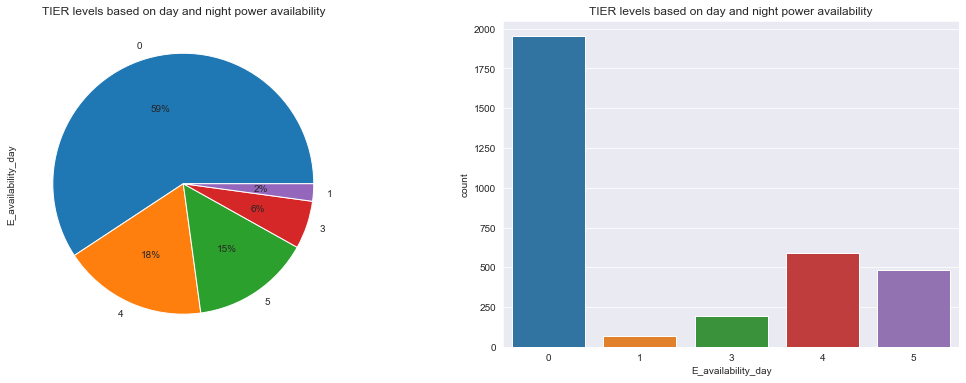

In [89]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_av_day['E_availability_day'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on day and night power availability')

#Barplot
sns.countplot('E_availability_day',data=df_av_day,ax=ax[1])
ax[1].set_title('TIER levels based on day and night power availability')

### Evening Total-Avaliability

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C27A represents the hours of electricity available each evening from the national grid in the worst months. 
* Whereas, C27B represents the hours of electricity available each evening from  the national grid in the typical months.
* C69A represents the hours of electricity available each evening from the mini grid in the worst months.
* Whereas, C69B represents the hours of electricity available each evening from  the mini grid in the typical months.
* C108A represents the hours of electricity available each evening from the generator set in the worst months.
* Whereas, C108B represents the hours of electricity available each evening from  the generator set in the typical months.
* C138A represents the hours of electricity available each evening from pico-hydro in the worst months.
* Whereas, C138B represents the hours of electricity available each evening from  pico-hydro in the typical months.
* C173A represents the hours of electricity available each evening from main solar based devices in the worst months.
* Whereas, C173B represents the hours of electricity available each evening from  main solar based devices in the typical months.

In [90]:
df_availibility_evening= df[['C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B']]

In [91]:
df_availibility_evening.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

### Evening Calculating the tier level

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the MTF takes the worst condition into account for enery access assessment.

In [92]:
#National Grid
df_availibility_evening['National_grid_Total'] = df_availibility_evening.National_grid_Worst.fillna(value=df_availibility_evening.National_grid_Typical)

#National Grid
df_availibility_evening['Mini_grid_Total'] = df_availibility_evening.Mini_grid_Worst.fillna(value=df_availibility_evening.Mini_grid_Typical)

#Generator Set
df_availibility_evening['Generator_set_Total'] = df_availibility_evening.Generator_set_Worst.fillna(value=df_availibility_evening.Generator_set_Typical)

#Pico Hydro
df_availibility_evening['Pico_hydro_Total'] = df_availibility_evening.Pico_hydro_Worst.fillna(value=df_availibility_evening.Pico_hydro_Typical)

#Solar Devicce
df_availibility_evening['Solar_device_Total'] = df_availibility_evening.Solar_device_Worst.fillna(value=df_availibility_evening.Solar_device_Typical)


#Taking only the total values into consideration
df_av_evening = df_availibility_evening[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total']]

In [93]:
df_av_evening=df_av_evening.replace(to_replace="Don't know",value=0)
df_av_evening= df_av_evening.apply(pd.to_numeric, errors='coerce')

In [94]:
lst=[]
for i in range(df_av_evening.shape[0]):
    temp=0
    for j in range(df_av_evening.shape[1]):
        if math.isnan(df_av_evening.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_av_evening.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_av_evening["Total_availability"] = lst

In [95]:
df_av_evening['Total_availability'] = df_av_evening.replace(np.nan, 'Missing_data', regex=True)

In [96]:
# AVAILABILITY: Evening
#Note: conditions for TIER 4 and 5 are the same

def fun_E_availability(Total_availability):
    if Total_availability == 'Missing_data':
        return 0
    elif Total_availability == 0:
        return 0
    elif 0 < Total_availability < 1:
        return 0
    elif 1 <= Total_availability < 2:
        return 1
    elif 2 <= Total_availability < 3:
        return 2
    elif 3 <= Total_availability < 4:
        return 3
    else:
        return 4
    
func = np.vectorize(fun_E_availability) 
df_av_evening["E_availability_evening"] = func(df_av_evening["Total_availability"])

Text(0.5, 1.0, 'TIER levels based on evening power availability')

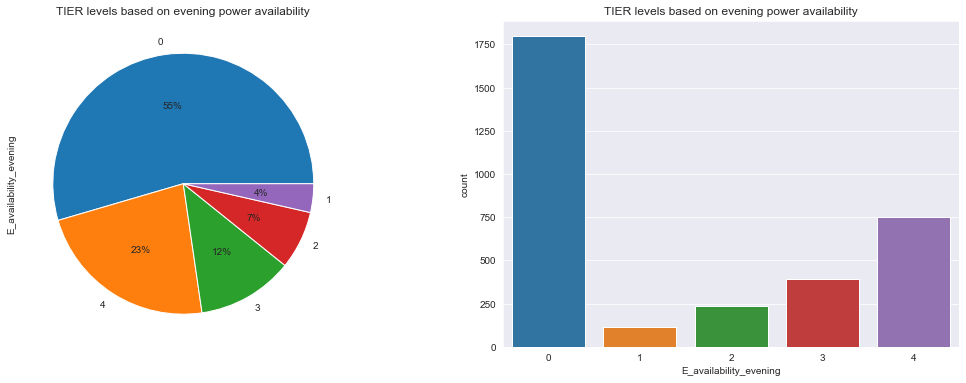

In [97]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_av_evening['E_availability_evening'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on evening power availability')

#Barplot
sns.countplot('E_availability_evening',data=df_av_evening,ax=ax[1])
ax[1].set_title('TIER levels based on evening power availability')

In the above graph we can see that the evening availability in:

1. TIER 1 contributes to 4% of evening availability which is at least 1 hours
2. TIER 2 contributes to 8% of evening availability which is at least 2 hours
3. TIER 3 contributes to 12% of evening availability which is at least 3 hours
4. TIER 4&5 contributes to 24% of evening availability which is at least 4 hours

# Attribute: Reliability

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 
* C29A represents the electricity disruption from the national grid in the worst months. 
* Whereas, C29B represents the electricity disruption from the national grid in the actual months.
* C71A represents the electricity disruption from the mini grid in the worst months. 
* Whereas, C71B represents the electricity disruption from the mini grid in the actual months.

In [98]:
df_reliability = df[['C29A','C29B','C71A','C71B']]

In [99]:
df_reliability.columns = ['National_grid_Worst','National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical']

## Total Reliability

In this step Total reliability from all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [100]:
#National Grid
df_reliability['National_grid_Total'] = df_reliability.National_grid_Worst.fillna(value=df_reliability.National_grid_Typical)

#National Grid
df_reliability['Mini_grid_Total'] = df_reliability.Mini_grid_Worst.fillna(value=df_reliability.Mini_grid_Typical)

#Taking only the total values into consideration
#df_rel_new=df_reliability[['National_grid_Total','Mini_grid_Total']]

In [101]:
df_reliability = df_reliability.replace(to_replace="Don't know",value=0)
df_reliability = df_reliability.apply(pd.to_numeric, errors='coerce')
df_reliability

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,National_grid_Total,Mini_grid_Total
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3290,NaN,NaN,NaN,NaN,NaN,NaN
3291,3.0,1.0,NaN,NaN,3.0,NaN
3292,1.0,0.0,NaN,NaN,1.0,NaN
3293,NaN,2.0,NaN,NaN,2.0,NaN


In [102]:
lst=[]
for i in range(df_reliability.shape[0]):
    temp=0
    for j in range(df_reliability.shape[1]):
        if math.isnan(df_reliability.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_reliability.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_reliability["Total_reliability"] = lst

In [103]:
df_reliability['Total_reliability'] = df_reliability.replace(np.nan, 'Missing_data', regex=True)
df_reliability

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,National_grid_Total,Mini_grid_Total,Total_reliability
0,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
1,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
2,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
3,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
4,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
...,...,...,...,...,...,...,...
3290,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
3291,3.0,1.0,NaN,NaN,3.0,NaN,3
3292,1.0,0.0,NaN,NaN,1.0,NaN,1
3293,NaN,2.0,NaN,NaN,2.0,NaN,Missing_data


## Calculating the tier level

In [104]:
#Note: conditions for TIER 3 and 4 are the same and for TIER 0,1 and 2 are the same

def fun_E_reliability(Total_reliability):
    if Total_reliability == 'Missing_data':
        return 0
    elif Total_reliability == 0:
        return 0
    elif 0 < Total_reliability <= 3:
        return 5
    elif 3 < Total_reliability <= 14:
        return 3
    else:
        return 0
    
func = np.vectorize(fun_E_reliability)
df_reliability["E_reliability"] = func(df_reliability["Total_reliability"])

Text(0.5, 1.0, 'TIER levels based on reliability')

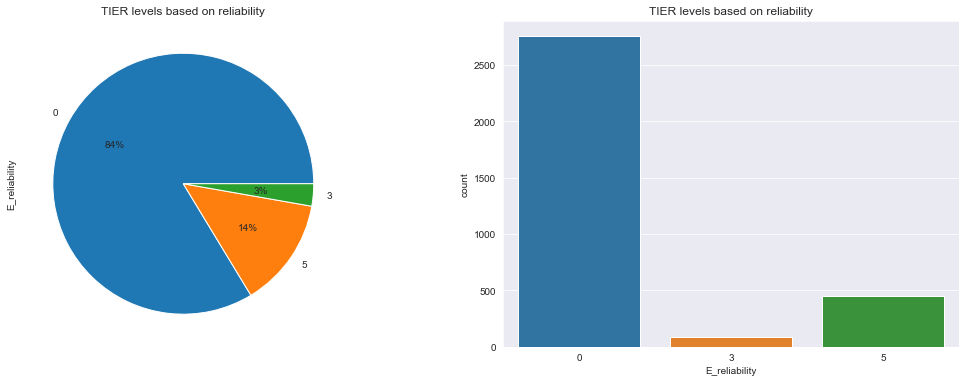

In [105]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_reliability["E_reliability"].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('E_reliability',data=df_reliability,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

# Attribute: Quality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C39 represents the damaged appliances from the national grid. 
* C81 represents the damaged appliances from the mini grid.
* C110 represents the damaged appliances from the generator set.
* C140 represents the damaged appliances from the Pico-hydro.

In [106]:
df_quality = df[['C39','C81','C110','C140']]

In [107]:
df_quality.columns = ['National_grid', 'Mini_grid','Generator_set','Pico_hydro']

In [108]:
df_quality = df_quality.replace(to_replace="Don?t know",value='Missing_data')

In [109]:
df_quality = df_quality.replace(np.nan, 'Missing_data', regex=True)

In [110]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   National_grid  3295 non-null   object
 1   Mini_grid      3295 non-null   object
 2   Generator_set  3295 non-null   object
 3   Pico_hydro     3295 non-null   object
dtypes: object(4)
memory usage: 103.1+ KB


In [111]:
#Note: conditions for TIER 3 and 4 are the same and for TIER 0,1 and 2 are the same

def fun_E_quality(quality):
    if quality == 'Missing_data':
        return 0
    elif quality == "Yes":
        return 5
    else: 
        return 0

    
func = np.vectorize(fun_E_quality)
df_quality["E_quality"] = func(df_quality['National_grid'])

Text(0.5, 1.0, 'TIER levels based on reliability')

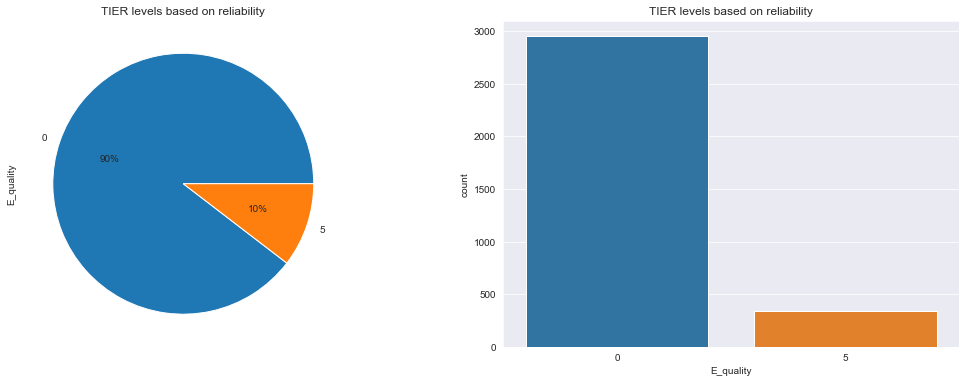

In [112]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_quality["E_quality"].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('E_quality',data=df_quality,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

# Attibute: Affordability
No data about income was collected

# Attribute: legality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C17 represents the electricity bill payment for using the national grid. 
* C57 represents the electricity bill payment for using the mini grid.

In [113]:
df_legality= df[['C17','C57']]

In [114]:
df_legality.columns = ['National_grid', 'Mini_grid']

In [115]:
df_legality = df_legality.replace(np.nan, 'Missing_data', regex=True)

In [116]:
df_legality['National_grid'].value_counts()

Missing_data                               1663
Pre-paid                                   1400
Fixed monthly fee                           109
Pay based on lights and appliances used      41
No bill for electricity                      32
Other                                        24
Monthly bill                                 14
We never used electricity                    10
Utility estimates consumption                 2
Name: National_grid, dtype: int64

In [117]:
df_legality['Mini_grid'].value_counts()

Missing_data                               3289
No bill for electricity                       2
Fixed monthly fee                             2
Other                                         1
Pay based on lights and appliances used       1
Name: Mini_grid, dtype: int64

In [118]:
# Values vor mini-grid will be neglected

In [119]:
def fun_E_legality(National_grid):
    if National_grid == 'Missing_data':
        return 0
    elif National_grid == 'No bill for electricity' or National_grid == 'We never used electricity':
        return 0
    else:
        return 5
    
func = np.vectorize(fun_E_legality)
df_legality["E_legality"] = func(df_legality["National_grid"])

Text(0.5, 1.0, 'TIER levels based on legality')

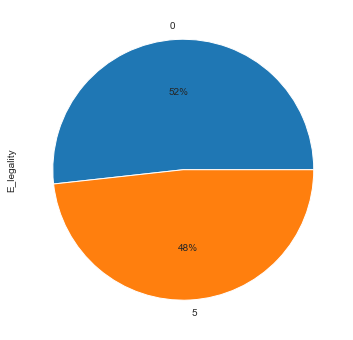

In [120]:
df_legality['E_legality'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on legality')

# Attribute: Health and Safety

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C41 represents the accidents caused using the national grid. 
* C83 represents the accidents caused using the mini grid.
* C112 represents the accidents caused using the generator set.
* C130 represents the accidents caused using the battery.
* C142 represents the accidents caused using the Pico-hydro.
* C175 represents the accidents caused using the solar based devices.

In [121]:
df_health= df[['C41','C83','C112','C130','C142','C175']]

In [122]:
df_health.columns = ['National_grid', 'Mini_grid','Generator_set','Battery','Pico_hydro','Solar_devices']

In [123]:
df_health = df_health.replace(np.nan, 'Missing_data', regex=True)

In [124]:
def fun_E_health(National_grid):
    if National_grid == 'Missing_data':
        return 0
    elif National_grid=='Yes' :
        return 0
    else:
        return 5
    
func = np.vectorize(fun_E_health)
df_health["E_health"] = func(df_health["National_grid"])

Text(0.5, 1.0, 'TIER levels based on reliability')

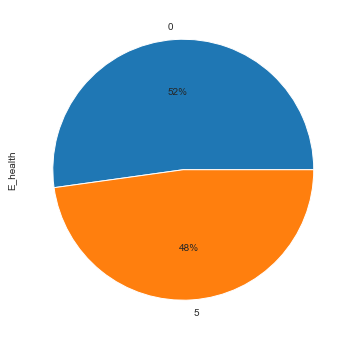

In [125]:
df_health['E_health'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on reliability')

In [131]:
df_MTF = pd.DataFrame([df_capacity["E_capacity"], df_av_day['E_availability_day'], df_av_evening['E_availability_evening'], df_reliability["E_reliability"], df_quality["E_quality"], df_legality['E_legality'], df_health['E_health']])
HH_MTF_Rwanda = df_MTF.T
HH_MTF_Rwanda.columns

Index(['E_capacity', 'E_availability_day', 'E_availability_evening',
       'E_reliability', 'E_quality', 'E_legality', 'E_health'],
      dtype='object')

In [132]:
HH_MTF_Rwanda.to_csv("HH_MTF_Rwanda.csv")